# Gastos publicos dos senadores brasileiros
# Brazilian senators' outgoing

In [4]:
import pandas as pd
df = pd.read_csv('/home/pc/workspace/anaconda/files/senado_federal/ceap_2016.csv', encoding='ISO-8859-9',delimiter=',', low_memory=False, decimal=",",)

In [5]:
df.head(2)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.60
1,2016.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84


# Limpesa de dados
# Data cleaning

* Retirando linhas cujo nome do senador não esteja preenchido. (Erase row when senator names is null)

In [8]:
df = df.dropna(subset=['SENADOR'], axis=0)

* Retirando linhas cujo valor reembolsado não estaja preenchido. (Erase row when refund value is null)

In [9]:
df = df.dropna(subset=['VALOR_REEMBOLSADO'], axis=0)

In [10]:
df.dtypes


ANO                  float64
MES                  float64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
dtype: object

In [12]:
df.describe()


,ANO,MES,VALOR_REEMBOLSADO
count,20445.0,20445.000000,20445.000000
mean,2016.0,5.170262,894.152074
std,0.0,2.505602,1873.505813
min,2016.0,1.000000,0.010000
25%,2016.0,3.000000,120.230000
50%,2016.0,5.000000,314.710000
75%,2016.0,7.000000,901.390000
max,2016.0,10.000000,44500.000000


# Dicionário que contém todos os nomes dos politicos sem repetição

In [13]:
gastos_senadores= {}
nome_senadores=df.SENADOR.unique()

In [16]:
nome_senadores[0:3]

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'ALOYSIO NUNES FERREIRA'], dtype=object)

In [23]:
for nome in nome_senadores:
    serie_senador = df[df.SENADOR == nome]
    total_reembolso = serie_senador['VALOR_REEMBOLSADO'].sum()
    gastos_senadores[nome] = total_reembolso

df_reembolso_por_senador = pd.DataFrame.from_dict(gastos_senadores, orient='index')
df_reembolso_por_senador.columns = ['VALOR_REEMBOLSADO']


In [44]:
df_reembolso_por_senador.head(2)

,VALOR_REEMBOLSADO
PAULO ROCHA,405884.86
RANDOLFE RODRIGUES,400101.07


# Ordenando em ordem decrescente por valor do reembolso

In [26]:
df_reembolso_por_senador = df_reembolso_por_senador.sort_values('VALOR_REEMBOLSADO', ascending=False)

# Tell to notebook print the chart inline

In [53]:
%matplotlib inline

/home/pc/tools/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


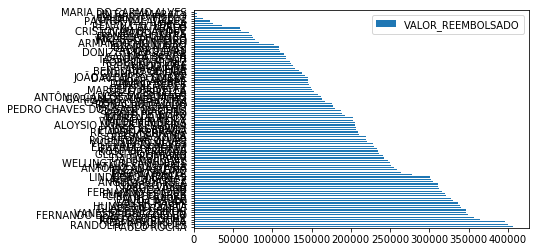

In [54]:

df_reembolso_por_senador.plot.barh()